In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [35]:
import pandas as pd

file_path = "D:/AI_CNN/nsl-kdd/KDDTrain+_20Percent._csv.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())

# Select only the first six columns and treat the rest as null values
selected_columns = data.columns[:6].tolist()  # Select the first six columns
data_processed = data[selected_columns].copy()  # Create a new DataFrame with selected columns

# Fill null values in the remaining columns with NaN
data_processed[data.columns[6:]] = pd.DataFrame([[pd.NA]*len(data.columns[6:])], index=data_processed.index)

# Extract the target column 'class'
target_column = data['class']

# Display the processed data and target column
print(data_processed.head())
print(target_column.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [46]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load the dataset
# Assuming df contains your dataset
df = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables
categorical_cols = ['protocol_type', 'service', 'flag']
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(df_filled[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded data with numerical columns
preprocessed_df = pd.concat([df_filled.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Scale numerical features
numerical_cols = [col for col in preprocessed_df.columns if col not in categorical_cols + ['class']]
scaler = StandardScaler()
preprocessed_df[numerical_cols] = scaler.fit_transform(preprocessed_df[numerical_cols])

# Show the preprocessed data
print(preprocessed_df.head())


   duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
0 -0.113551  -0.009889  -0.039310 -0.00891       -0.091223 -0.006301   
1 -0.113551  -0.010032  -0.039310 -0.00891       -0.091223 -0.006301   
2 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
3 -0.113551  -0.009996   0.052473 -0.00891       -0.091223 -0.006301   
4 -0.113551  -0.010010  -0.034582 -0.00891       -0.091223 -0.006301   

        hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0 -0.091933           -0.02622  -0.807626        -0.021873  ... -0.310562   
1 -0.091933           -0.02622  -0.807626        -0.021873  ... -0.310562   
2 -0.091933           -0.02622  -0.807626        -0.021873  ... -0.310562   
3 -0.091933           -0.02622   1.238197        -0.021873  ... -0.310562   
4 -0.091933           -0.02622   1.238197        -0.021873  ... -0.310562   

   flag_RSTO  flag_RSTOS0  flag_RSTR   flag_S0   flag_S1   flag_S2   flag_S3  \
0   -0.11052    -0.02888

In [69]:
# Save preprocessed_df to a CSV file
preprocessed_df.to_csv('preprocessed_data.csv', index=False)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'preprocessed_df' contains the preprocessed data
X = preprocessed_df.drop('class', axis=1)
y = preprocessed_df['class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=42)

# Train the classifier using the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=42)

In [60]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming df contains your dataset
df = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables
categorical_cols = ['protocol_type', 'service', 'flag']
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(df_filled[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded data with numerical columns
preprocessed_df = pd.concat([df_filled.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Scale numerical features
numerical_cols = [col for col in preprocessed_df.columns if col not in categorical_cols + ['class']]
scaler = StandardScaler()
preprocessed_df[numerical_cols] = scaler.fit_transform(preprocessed_df[numerical_cols])

# Split the data into features (X) and target variable (y)
X = preprocessed_df.drop('class', axis=1)
y = preprocessed_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier with preprocessed data
rf_classifier_preprocessed = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=42)
rf_classifier_preprocessed.fit(X_train, y_train)

# Make predictions on the preprocessed testing set
y_pred_preprocessed = rf_classifier_preprocessed.predict(X_test)

# Compute evaluation metrics using preprocessed predictions and target variable
accuracy_preprocessed = accuracy_score(y_test, y_pred_preprocessed)
precision_preprocessed = precision_score(y_test, y_pred_preprocessed, average='weighted')
recall_preprocessed = recall_score(y_test, y_pred_preprocessed, average='weighted')
f1_preprocessed = f1_score(y_test, y_pred_preprocessed, average='weighted')
roc_auc_preprocessed = roc_auc_score(y_test, rf_classifier_preprocessed.predict_proba(X_test)[:, 1])

# Display the evaluation metrics for preprocessed data
print(f'Accuracy (Preprocessed): {accuracy_preprocessed}')
print(f'Precision (Preprocessed): {precision_preprocessed}')
print(f'Recall (Preprocessed): {recall_preprocessed}')
print(f'F1 Score (Preprocessed): {f1_preprocessed}')
print(f'ROC-AUC Score (Preprocessed): {roc_auc_preprocessed}')

# Compute and display the confusion matrix for preprocessed data
conf_matrix_preprocessed = confusion_matrix(y_test, y_pred_preprocessed)
print('Confusion Matrix (Preprocessed):')
print(conf_matrix_preprocessed)


Accuracy (Preprocessed): 0.9944433419329232
Precision (Preprocessed): 0.9944719306570318
Recall (Preprocessed): 0.9944433419329232
F1 Score (Preprocessed): 0.9944418958068636
ROC-AUC Score (Preprocessed): 0.9998598990197676
Confusion Matrix (Preprocessed):
[[2341   24]
 [   4 2670]]


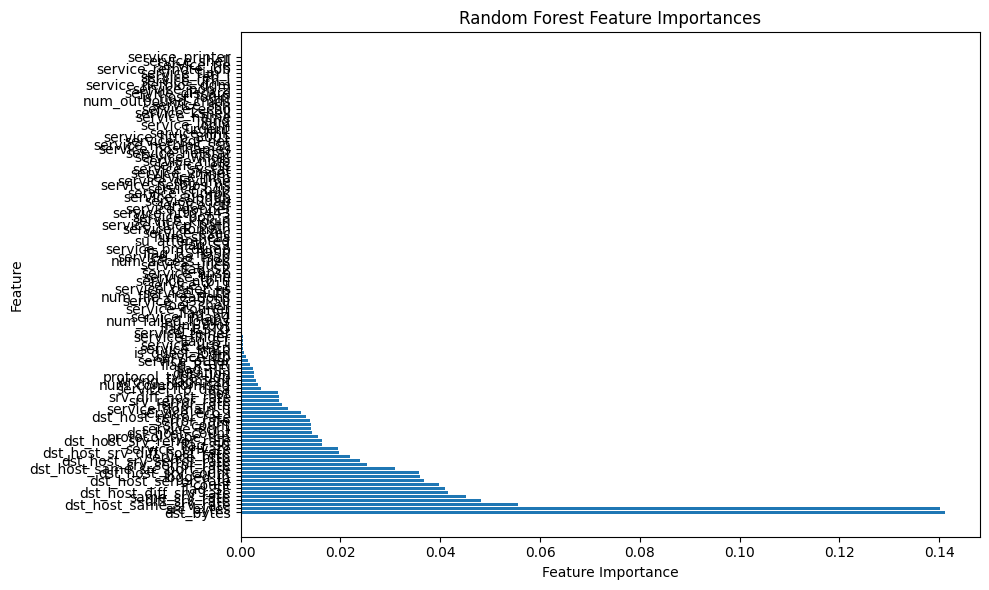

In [74]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier_preprocessed.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get feature names
feature_names = X.columns[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import plot_tree

# Visualize an individual decision tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier_preprocessed.estimators_[0], feature_names=X.columns, filled=True)
plt.title('Random Forest Decision Tree')
plt.show()


In [63]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming df contains your dataset
df = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables
categorical_cols = ['protocol_type', 'service', 'flag']
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(df_filled[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded data with numerical columns
preprocessed_df = pd.concat([df_filled.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Scale numerical features
numerical_cols = [col for col in preprocessed_df.columns if col not in categorical_cols + ['class']]
scaler = StandardScaler()
preprocessed_df[numerical_cols] = scaler.fit_transform(preprocessed_df[numerical_cols])

# Split the data into features (X) and target variable (y)
X = preprocessed_df.drop('class', axis=1)
y = preprocessed_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Initialize and train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the preprocessed testing set using the best classifier
y_pred_best = best_rf_classifier.predict(X_test)

# Compute evaluation metrics using predictions and target variable
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])

# Display the evaluation metrics for the best classifier
print(f'Accuracy (Best): {accuracy_best}')
print(f'Precision (Best): {precision_best}')
print(f'Recall (Best): {recall_best}')
print(f'F1 Score (Best): {f1_best}')
print(f'ROC-AUC Score (Best): {roc_auc_best}')

# Compute and display the confusion matrix for the best classifier
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print('Confusion Matrix (Best):')
print(conf_matrix_best)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 300}
Accuracy (Best): 0.9974201230402858
Precision (Best): 0.9974235371716923
Recall (Best): 0.9974201230402858
F1 Score (Best): 0.9974198974051671
ROC-AUC Score (Best): 0.9999527198723595
Confusion Matrix (Best):
[[2355   10]
 [   3 2671]]


In [64]:
from joblib import dump
# Save the trained Random Forest classifier to a .pkl file
dump(best_rf_classifier, 'best_rf_classifier.pkl')


['best_rf_classifier.pkl']

In [73]:
from joblib import load
import pandas as pd

# Load the trained Random Forest classifier from the .pkl file
loaded_rf_classifier = load('best_rf_classifier.pkl')

# Load new data for prediction (assuming X_new contains new data)
# X_new = pd.read_csv('new_data.csv')

n_d=[[-0.11355065746330564,-0.009888853479441658,-0.03930978546744752,-0.008910476190799476,-0.09122317561979301,-0.006300533079152697,-0.09193335264364132,-0.026220290396778072,-0.8076258173668976,-0.02187260570040307,-0.03937652693489434,-0.027665473285150746,-0.02172416443293537,-0.02780801692954628,-0.01890460127825327,-0.043916784759860654,0.0,0.0,-0.09598961031298031,-0.7202435993613812,-0.3546279437593853,-0.6401420104435835,-0.6339781727479632,-0.3721856030582833,-0.37309834734587105,0.7721086624557036,-0.34928194284986874,-0.37388608116002986,-0.32863359225340105,-0.8139845208624928,-0.7791568962683815,-0.2806732973983697,0.07311973926821684,-0.28799346401714504,-0.6418040711090527,-0.6273647472416872,-0.22166805566652795,-0.3742807483590511,normal,0.47678238848657545,-0.36843833993379144,-0.029564445138860505,-0.08291260700086721,-0.08694304405098167,-0.07634968327105565,-0.08094850844615967,-0.06652564061185304,-0.07118164265978597,-0.06531077483194403,-0.0646949355613578,-0.06592095796209665,-0.2790536806786916,-0.05086117141309114,-0.193477635708883,-0.15792399887877773,-0.06622397739642624,-0.06021090907444311,-0.1214191441064654,-0.11783452827353742,4.128661438312217,-0.06592095796209665,-0.06184909705487242,-0.6823404265721018,-0.06712497145425804,-0.006300533079152697,-0.07421659180131499,-0.07229969239857756,-0.060542040314300015,-0.05163977794943221,-0.05987797327507998,-0.058185135706009125,-0.05608726298871754,-0.059877973275079974,-0.06054204031430002,-0.058185135706009125,-0.05500872246924734,-0.05163977794943221,-0.055730040207595186,-0.07004611463483036,-0.04926744409153052,-0.03566314758107461,-0.18777462012786864,-0.010913276637715045,-0.025986017170419373,-0.04591598822264409,-0.021830453621527978,-0.4569148413092173,-0.010913276637715045,-0.025986017170419373,-0.028187472550259825,-0.020900653051107033,-0.24703949819246748,-0.04277051308958909,-0.04803780903953025,-0.05163977794943222,-0.06742267460433099,-0.059206566049319675,-0.13981249331682094,-0.008910476190799474,-0.07868187567928583,-0.01260181655676718,-0.07033168131447917,-0.07919103668718935,-0.07285241492571949,-0.06531077483194402,-0.07608624357302193,-0.3105615365214659,-0.11052023323516612,-0.028884138085094987,-0.14186448281407887,-0.6208622588413719,-0.059206566049319675,-0.028884138085094987,-0.024408643231446675,0.8261326515463352,-0.041349843230299985]]

# Make predictions using the loaded classifier
predictions = loaded_rf_classifier.predict(n_d)

# Print the predictions
print(predictions)


NameError: name 'normal' is not defined